In [6]:
!pip install numpy pandas matplotlib seaborn scikit-learn folium


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/modis_2020_India.csv')
df2 = pd.read_csv('/content/drive/MyDrive/modis_2021_India.csv')
df3 = pd.read_csv('/content/drive/MyDrive/modis_2022_India 2.csv')  # Keep as is if the name is correct


In [5]:
df1.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.1282,96.9943,301.4,1.7,1.3,2020-01-01,357,Terra,MODIS,40,6.03,278.8,15.3,D,0
1,33.1827,74.0774,301.5,1.5,1.2,2020-01-01,534,Terra,MODIS,48,6.03,280.6,12.3,D,0
2,30.0068,80.6242,300.6,1.1,1.1,2020-01-01,535,Terra,MODIS,38,6.03,278.7,9.1,D,0
3,28.9858,79.6159,304.1,1.1,1.0,2020-01-01,535,Terra,MODIS,58,6.03,288.8,6.4,D,0
4,30.1529,80.2387,301.9,1.1,1.0,2020-01-01,535,Terra,MODIS,41,6.03,274.5,7.3,D,0


In [6]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [7]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [8]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.1282,96.9943,301.4,1.7,1.3,2020-01-01,357,Terra,MODIS,40,6.03,278.8,15.3,D,0
1,33.1827,74.0774,301.5,1.5,1.2,2020-01-01,534,Terra,MODIS,48,6.03,280.6,12.3,D,0
2,30.0068,80.6242,300.6,1.1,1.1,2020-01-01,535,Terra,MODIS,38,6.03,278.7,9.1,D,0
3,28.9858,79.6159,304.1,1.1,1.0,2020-01-01,535,Terra,MODIS,58,6.03,288.8,6.4,D,0
4,30.1529,80.2387,301.9,1.1,1.0,2020-01-01,535,Terra,MODIS,41,6.03,274.5,7.3,D,0


In [9]:
df.shape

(268813, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268813 entries, 0 to 268812
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    268813 non-null  float64
 1   longitude   268813 non-null  float64
 2   brightness  268813 non-null  float64
 3   scan        268813 non-null  float64
 4   track       268813 non-null  float64
 5   acq_date    268813 non-null  object 
 6   acq_time    268813 non-null  int64  
 7   satellite   268813 non-null  object 
 8   instrument  268813 non-null  object 
 9   confidence  268813 non-null  int64  
 10  version     268813 non-null  float64
 11  bright_t31  268813 non-null  float64
 12  frp         268813 non-null  float64
 13  daynight    268813 non-null  object 
 14  type        268813 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 30.8+ MB


In [12]:
df.isnull()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268808,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268809,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268810,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268811,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()


,0
latitude,0
longitude,0
brightness,0
scan,0
track,0
acq_date,0
acq_time,0
satellite,0
instrument,0
confidence,0


In [15]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,268813.0,24.458636,4.864815e+00,8.1072,21.4592,24.2547,29.5499,34.9734
longitude,268813.0,81.102506,6.683031e+00,68.4526,75.7023,78.8165,84.6254,97.1033
brightness,268813.0,324.088980,1.454114e+01,300.0000,314.7000,322.0000,331.3000,505.7000
scan,268813.0,1.420356,6.374145e-01,1.0000,1.0000,1.2000,1.5000,4.8000
track,268813.0,1.151785,2.034631e-01,1.0000,1.0000,1.1000,1.2000,2.0000
acq_time,268813.0,821.670671,3.495800e+02,325.0000,644.0000,753.0000,821.0000,2150.0000
confidence,268813.0,64.359908,1.834998e+01,0.0000,54.0000,66.0000,76.0000,100.0000
version,268813.0,6.030000,2.324634e-11,6.0300,6.0300,6.0300,6.0300,6.0300
bright_t31,268813.0,303.449820,8.278704e+00,267.0000,298.4000,302.4000,308.8000,400.1000
frp,268813.0,28.169586,7.986718e+01,0.0000,8.8000,13.8000,25.2000,6961.8000


In [19]:
df.type.value_counts()

,count
type,
0,255694
2,13072
3,47


In [20]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}")
    print(f"Number of Unique Values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique Values: ['2020-01-01' '2020-01-02' '2020-01-03' ... '2022-12-29' '2022-12-30'
 '2022-12-31']
Number of Unique Values: 1090
--------------------------------------------------
Column: satellite
Unique Values: ['Terra' 'Aqua']
Number of Unique Values: 2
--------------------------------------------------
Column: instrument
Unique Values: ['MODIS']
Number of Unique Values: 1
--------------------------------------------------
Column: daynight
Unique Values: ['D' 'N']
Number of Unique Values: 2
--------------------------------------------------


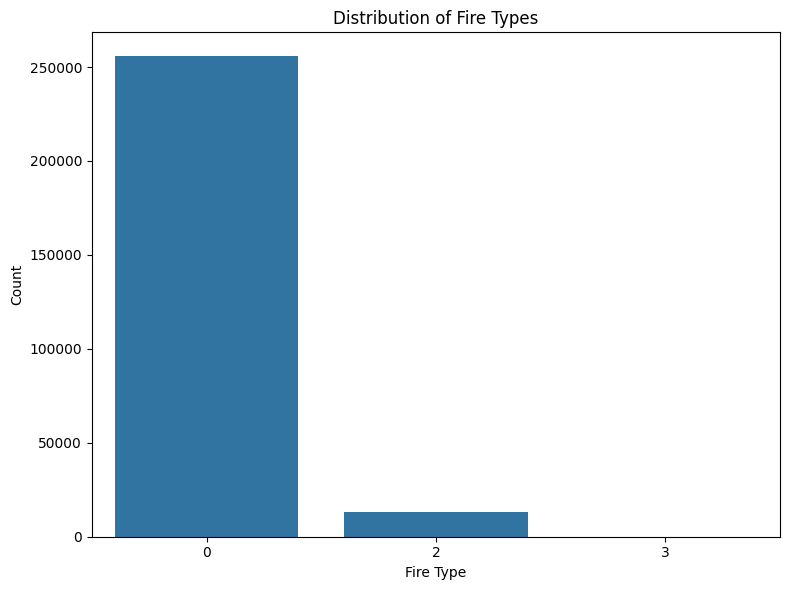

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


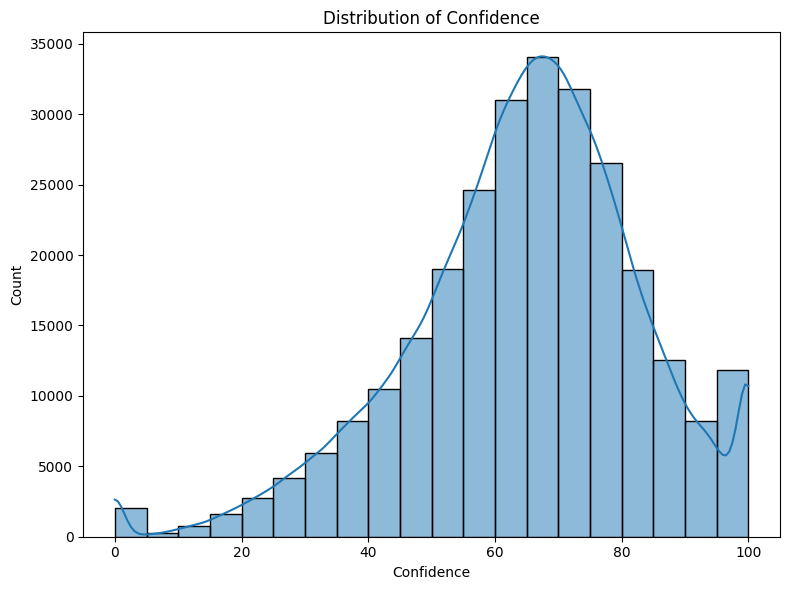

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'],bins=20,kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Count')
plt.tight_layout()
plt.show()